# Import Library

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

# Import Dataset

In [2]:
data = pd.read_csv('Jantung.csv')

https://archive.ics.uci.edu/ml/datasets/Heart+Disease

# Menampilkan beberapa data paling atas

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Data Deskripsi:**

age - Umur dalam setahun

sex - (1 = Pria || 0 = Wanita)

cp - chest pain type (jenis nyeri dada)
-- 1: typical angina
-- 2: atypical angina
-- 3: non-anginal pain
-- 4: asymptomatic

trestbps - resting blood pressure (dalam MM Hg(raksa) saat masuk ke rumah sakit)
Info Tambahan:
Tekanan darah optimal biasanya didefinisikan sebagai sistolik 120 mm Hg. 
diastolik lebih dari 80 mm Hg - yang merupakan tekanan saat jantung rileks.
Dan untuk detak jantung istirahat, targetnya adalah antara 60 dan 100 detak per menit

chol - serum kolestoral dalam mg/dl

fbs - (fasting blood sugar > 120 mg/dL) (1 = benar || 0 = salah)
Info Tambahan:
Kadar gula darah kurang dari 100 mg/dL adalah normal. Kadar gula darah dari 100 hingga 125 mg / dL dianggap pradiabetes. Jika 126 mg / dL atau lebih tinggi pada dua tes terpisah menderita diabetes

restecg - resting electrocardiographic results (pemeriksaan yang rutin dilakukan untuk mendeteksi berbagai kelainan pada jantung dengan cara mengetahui aktivitas kelistrikan jantung)
-- 0: normal
-- 1: memiliki kelainan gelombang ST-T
-- 2: menunjukkan kemungkinan atau pasti hipertrofi ventrikel kiri (pembesaran bilik kiri jantung)

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no) merupakan keluhan umum pasien jantung

oldpeak - Depresi ST disebabkan oleh olahraga relatif terhadap istirahat

slope - kemiringan segmen pada latihan ST puncak (0 = upsloping; 1 = flat; 2 = downsloping)

ca - jumlah pembuluh darah utama (0-3) diwarnai dengan fluoroskopi

thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

target - Memiliki Penyakit atau Tidak (1=yes, 0=no)

# Mengecek Data Kosong

In [4]:
print(data.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


# Cek Statistika Data

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Jumlah Data Target (1:Terkena Penyakit || 0:Tidak Terkena Penyakit)

In [6]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

# Exploratory Data Analysis
**Visualisasi Data**

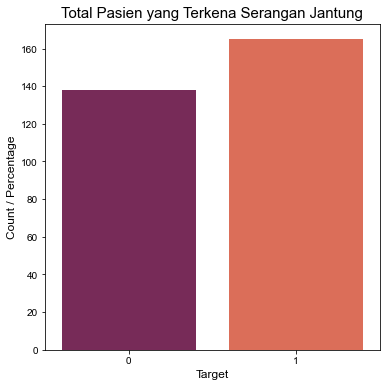

In [7]:
x = plt.subplots(figsize=(6,6))
x=sns.countplot(x="target", data=data, palette="rocket")
x.set_xlabel ("Target",fontsize=12)
x.set_ylabel ("Count / Percentage",fontsize=12)
x.set_title("Total Pasien yang Terkena Serangan Jantung", fontsize=15)
sns.set_style("whitegrid")
plt.show()

In [8]:
TidakKenaPenyakit = len(data[data.target == 0])
TerkenaPenyakit = len(data[data.target == 1])
print("Persentasi Pasien yang tidak terkena Penyakit Jantung: {:.2f}%".format((TidakKenaPenyakit / (len(data.target))*100)))
print("Persentasi Pasien yang terkena Penyakit Jantung: {:.2f}%".format((TerkenaPenyakit / (len(data.target))*100)))

Persentasi Pasien yang tidak terkena Penyakit Jantung: 45.54%
Persentasi Pasien yang terkena Penyakit Jantung: 54.46%


Didapatkan Hasil Total Pasien yang Terkena Penyakit Jantung >160 orang dan persentasi nya 54.46%, dibandingkan pasien yang tidak terkena penyakit jantung <140 dan persentasi nya 45.54%.

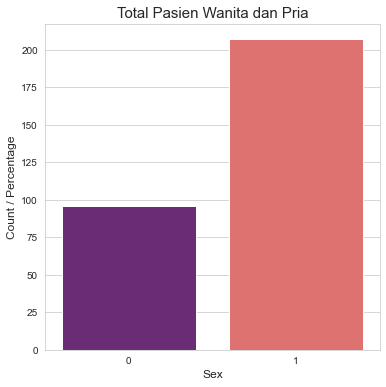

In [9]:
x=plt.subplots(figsize=(6,6))
x=sns.countplot(x="sex", data=data, palette="magma")
x.set_xlabel ("Sex",fontsize=12)
x.set_ylabel ("Count / Percentage",fontsize=12)
x.set_title("Total Pasien Wanita dan Pria", fontsize=15)
sns.set_style("whitegrid")
plt.show()

In [10]:
Wanita = len(data[data.sex == 0])
Pria = len(data[data.sex == 1])
print("Persentasi Pasien Wanita: {:.2f}%".format((Wanita / (len(data.sex))*100)))
print("Persentasi Pasien Pria: {:.2f}%".format((Pria / (len(data.sex))*100)))

Persentasi Pasien Wanita: 31.68%
Persentasi Pasien Pria: 68.32%


Didaptkan Hasil Total Pasien PRIA >200 pria dan persentasi nya 68.32%, dibandingkan pasien Wanita <100 dan persentasi nya 31.68%.

**Sekarang kita hubungkan dan visualisasikan antara sex dan target**

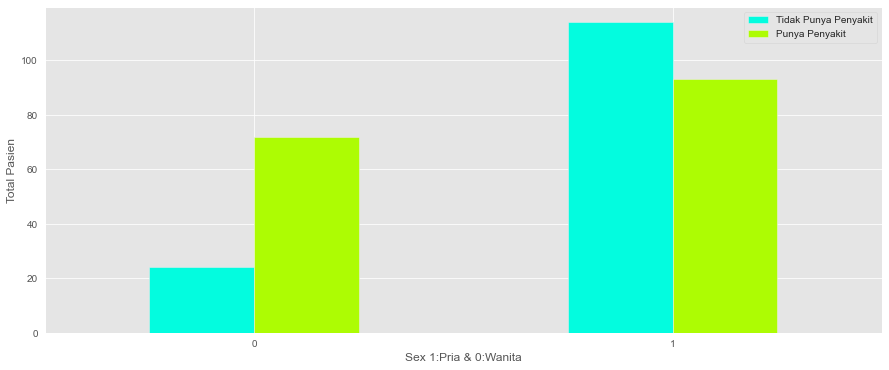

In [51]:
pd.crosstab(data.sex,data.target).plot(color=['#03fcdf','#adfc03'],kind="bar",figsize=(15,6))
plt.xlabel('Sex 1:Pria & 0:Wanita',fontsize=12)
plt.ylabel('Total Pasien',fontsize=12)
plt.xticks(rotation = 0)
plt.legend(["Tidak Punya Penyakit", "Punya Penyakit"])
plt.show()

**Visualisasi data umur untuk mengetahui meannya**

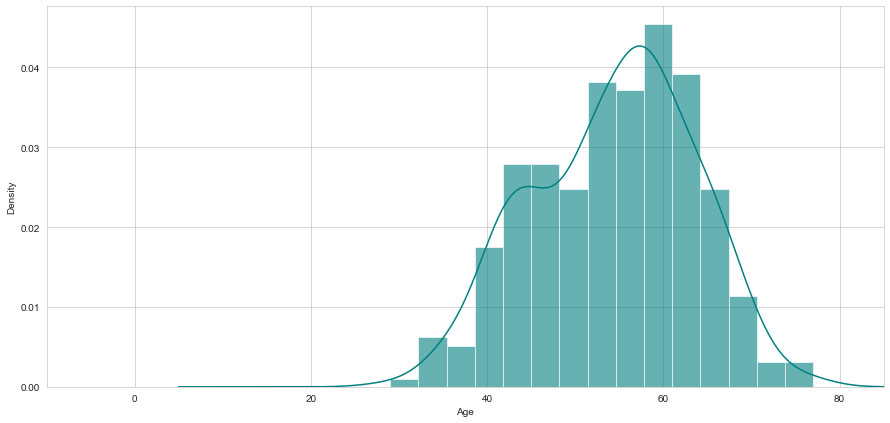

In [12]:
plt.subplots(figsize = (15,7))
ax = data["age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
data["age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [13]:
print('mean "Age" adalah %d' %(data["age"].mean(skipna=True)))
print('median "Age" adalah %d' %(data["age"].median(skipna=True)))

mean "Age" adalah 54
median "Age" adalah 55


**Visualisasi Data Hubungan antara age dan target (Memiliki Penyakit atau Tidak (1=yes, 0=no)**

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Banyak Pasien')

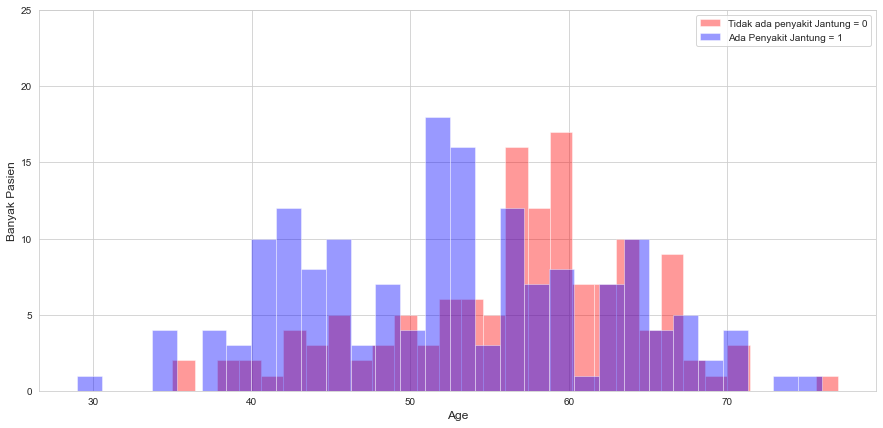

In [14]:
plt.subplots(figsize = (15,7))
sns.distplot(data[data['target'] == 0]['age'], bins = 30, kde = False,  color = 'red',label = 'Tidak ada penyakit Jantung = 0')
sns.distplot(data[data['target'] == 1]['age'], bins = 30, kde = False,  color = 'blue',label = 'Ada Penyakit Jantung = 1')
plt.ylim(0,25)
plt.legend()
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Banyak Pasien', fontsize = 12)

**Visualisasi Data Hubungan antara thalach-maximum heart archived, oldpeak, exang(ada keluhan angina atau tidak) dan target (Memiliki Penyakit atau Tidak (1=yes, 0=no))**

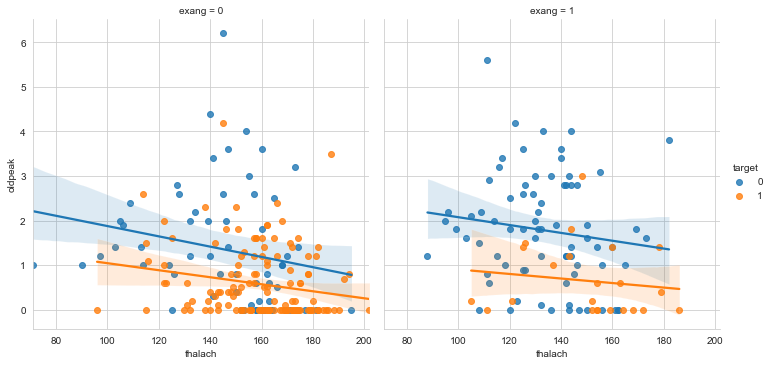

In [15]:
sns.lmplot(x ='thalach', y ='oldpeak', col ='exang', hue ='target', data=data)

**Visualisasi Data Hubungan antara age, thalach-Maximum Heart Archived dan target (Memiliki Penyakit atau Tidak (1=yes, 0=no))**

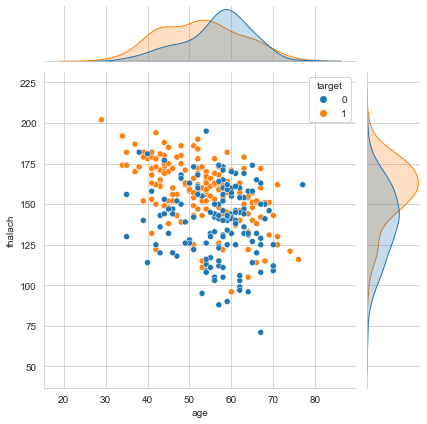

In [16]:
sns.jointplot(x = data['age'], y = data['thalach'], hue = data['target'], data = data)

**Banyak pasien yang terkena Penyakit jantung berdasarkan Kemiringan Segmen pada Latihan puncak ST**

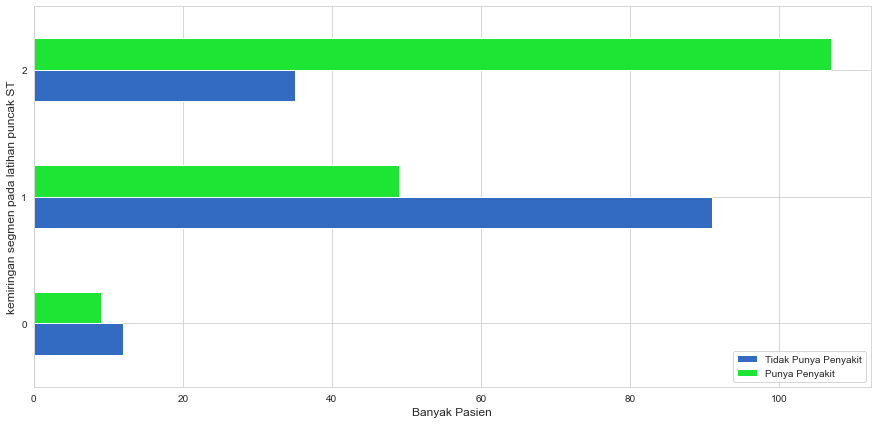

In [17]:
pd.crosstab(data.slope,data.target).plot(color=['#346bc2','#1ce633'],kind="barh",figsize=(15,7))
plt.ylabel('kemiringan segmen pada latihan puncak ST',fontsize=12)
plt.xlabel('Banyak Pasien',fontsize=12)
plt.xticks(rotation = 0)
plt.legend(["Tidak Punya Penyakit", "Punya Penyakit"])
plt.show()

slope - kemiringan segmen pada latihan ST puncak (0 = upsloping; 1 = flat; 2 = downsloping)

**Banyak pasien yang terkena Penyakit Jantung berdasarkan hasil resting electrocardiographic**

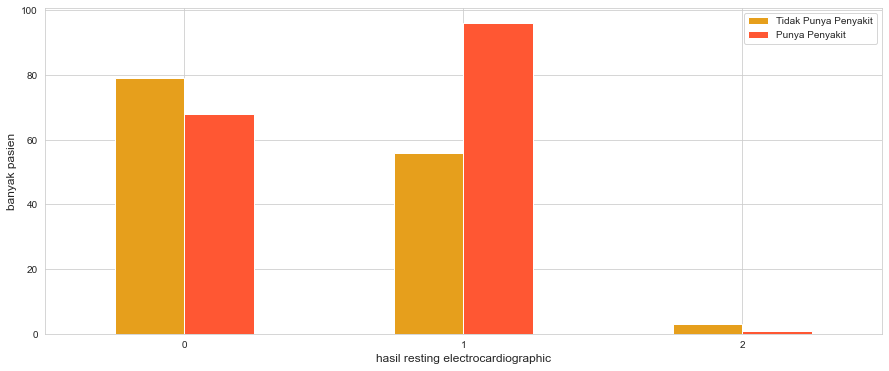

In [18]:
pd.crosstab(data.restecg,data.target).plot(color=['#e69f1c','#FF5733'],kind="bar",figsize=(15,6))
plt.xlabel('hasil resting electrocardiographic',fontsize=12)
plt.ylabel('banyak pasien',fontsize=12)
plt.xticks(rotation = 0)
plt.legend(["Tidak Punya Penyakit", "Punya Penyakit"])
plt.show()

0: normal -- 1: memiliki kelainan gelombang ST-T -- 2: menunjukkan kemungkinan atau pasti hipertrofi ventrikel kiri (pembesaran bilik kiri jantung)

**Banyak pasien yang terkena Penyakit Jantung Berdsarkan FBS**

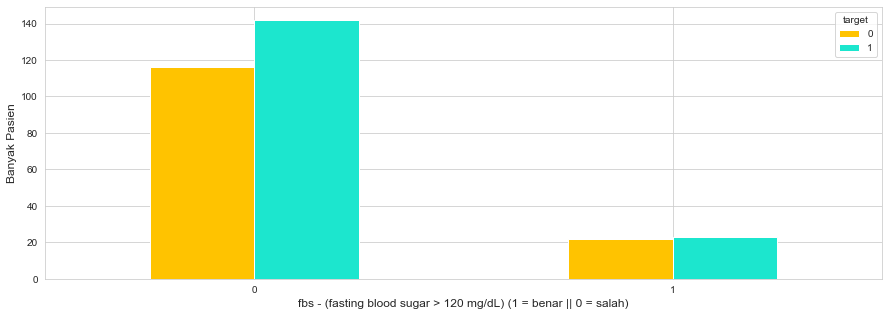

In [19]:
pd.crosstab(data.fbs,data.target).plot(color=['#FFC300','#1ce6ce'],kind="bar",figsize=(15,5))
plt.xlabel('fbs - (fasting blood sugar > 120 mg/dL) (1 = benar || 0 = salah)',fontsize=12)
plt.ylabel('Banyak Pasien',fontsize=12)
plt.xticks(rotation = 0)

plt.show()

**Banyak pasien yang terkena Penyakit Jantung Berdsarkan Jenis Nyeri Dada**

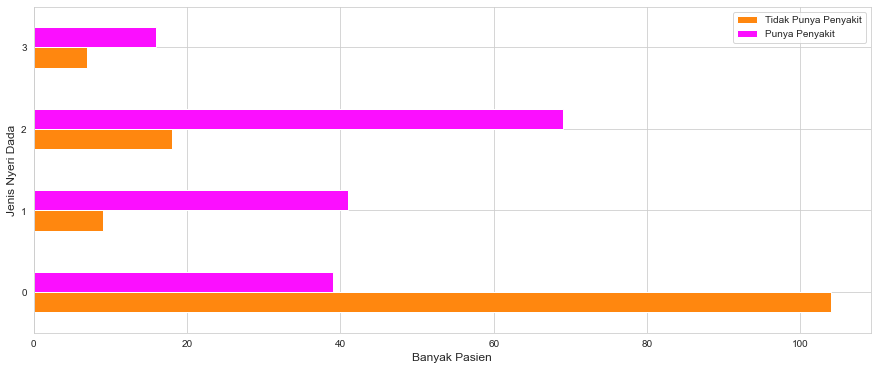

In [20]:
pd.crosstab(data.cp,data.target).plot(color=['#ff870f','#fb0fff'],kind="barh",figsize=(15,6))
plt.ylabel('Jenis Nyeri Dada',fontsize=12)
plt.xlabel('Banyak Pasien',fontsize=12)
plt.xticks(rotation = 0)
plt.legend(["Tidak Punya Penyakit", "Punya Penyakit"])
plt.show()

Jenis Nyeri Dada - 1: typical angina -- 2: atypical angina -- 3: non-anginal pain -- 4: asymptomatic

# Corelasi Semua Variabel yang ada

<AxesSubplot:>

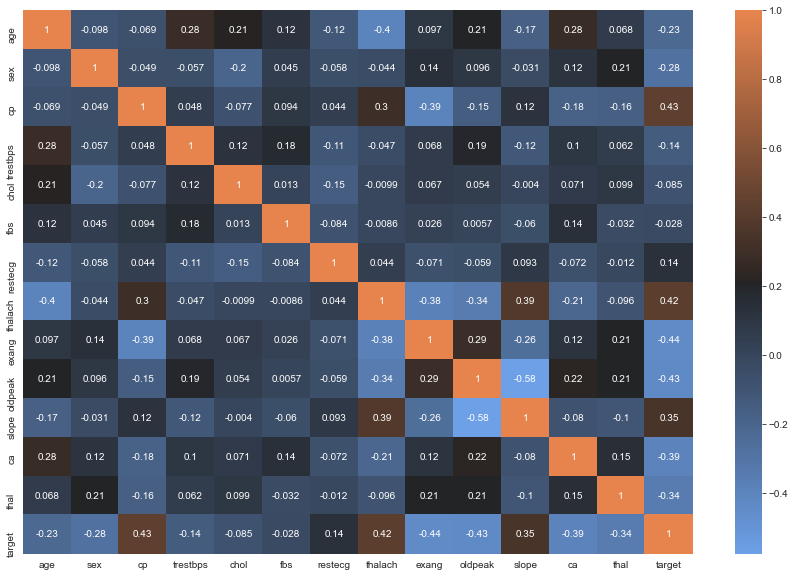

In [21]:
corr = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=True, cmap=sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True))
#heatmap berfungsi untuk visualisasi kotak2 biar lebih enak dilihat aja sih

https://seaborn.pydata.org/tutorial/color_palettes.html

# Train Test Split

In [22]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
#iloc = memilih data berdasarkan index

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)
#Ubah data menjadi training set dan testing set

**Normalisasi Data**

In [23]:
sc = StandardScaler()
#menormalkan data yang skala nya berbeda jauh

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Predictions and Evaluation

**LogisticRegression**

In [24]:
from sklearn.linear_model import LogisticRegression
#import library LogisticRegression

model1 = LogisticRegression(random_state=1)
#Mendapatkan Model
model1.fit(x_train, y_train)
#Train atau Fit model

y_pred1 = model1.predict(x_test)
#Dapatkan y prediction
print(classification_report(y_test, y_pred1))
#Output accuracy

              precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.71      0.81      0.76        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



Hasil Persentasi Accuracy dari model Logistic Regression adalah 74%

**Membuat Confusion Matrix**

<AxesSubplot:title={'center':'Logistic Regression Confusion Matrix'}>

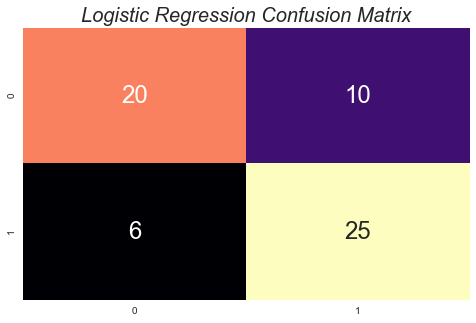

In [25]:
cm_lg=confusion_matrix(y_test,y_pred1)
#Membuat Confusion Matrix

plt.figure(figsize=(8,5))
plt.title("Logistic Regression Confusion Matrix",fontsize=20, style='oblique')
sns.heatmap(cm_lg,annot=True,cmap="magma",fmt="d",cbar=False, annot_kws={"size": 24})
#heatmap berfungsi untuk visualisasi kotak2 biar lebih enak dilihat aja sih

**K-NearestNeighbors**

In [26]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()
#Mendapatkan Model
model2.fit(x_train, y_train)
#Train atau Fit model

y_pred2 = model2.predict(x_test)
#Dapatkan y prediction
print(classification_report(y_test, y_pred2))
#Output accuracy

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        30
           1       0.74      0.81      0.77        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



Hasil Persentasi Accuracy dari model K-Nearest Neighbors adalah 75%

**Membuat Confusion Matrix**

<AxesSubplot:title={'center':'K-Nearest Neighbors Confusion Matrix'}>

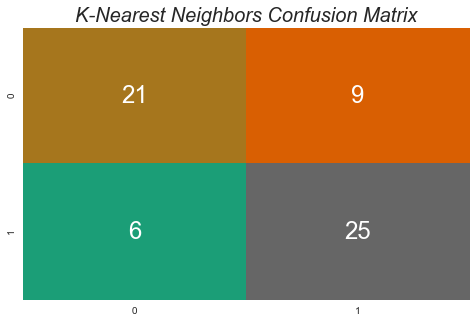

In [27]:
cm_knn=confusion_matrix(y_test,y_pred2)
#Membuat Confusion Matrix

plt.figure(figsize=(8,5))
plt.title("K-Nearest Neighbors Confusion Matrix",fontsize=20, style='oblique')
sns.heatmap(cm_knn,annot=True,cmap="Dark2",fmt="d",cbar=False, annot_kws={"size": 24})
#heatmap berfungsi untuk visualisasi kotak2 biar lebih enak dilihat aja sih

**Buat perulangan yang mentraining model KNN dengan nilai k yang berbeda untuk mendapatkan accuracy yang lebih baik**

In [28]:
err_rates = []
for idx in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = idx)
    knn.fit(x_train, y_train)
    pred_idx = knn.predict(x_test)
    err_rates.append(np.mean(y_test != pred_idx))

Text(0.5, 1.0, 'Error Rate vs K-value')

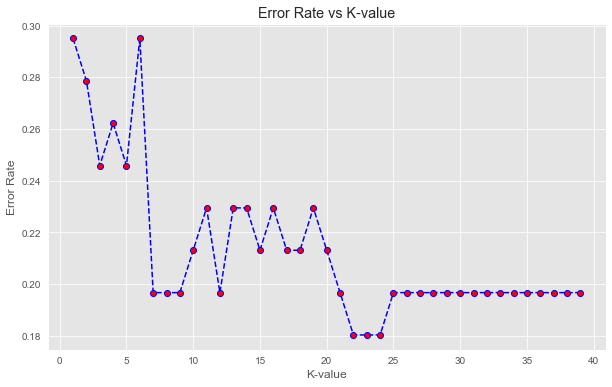

In [29]:
#Membuat Plot dari Perulangan di atas
plt.style.use('ggplot')
plt.subplots(figsize = (10,6))
plt.plot(range(1,40), err_rates, linestyle = 'dashed', color = 'blue', marker = 'o', markerfacecolor = 'red')
plt.xlabel('K-value')
plt.ylabel('Error Rate')
plt.title('Error Rate vs K-value')

**Kita ambil titik yang paling bawah, biar error rate nya kecil dan train kembali model dengan K value terbaik**

In [30]:
KNN = KNeighborsClassifier(n_neighbors = 24)
#Bisa dilihat titik terkecil nya ada di antara nilai 22-24

KNN.fit(x_train,y_train)
y_predict = KNN.predict(x_test)

In [31]:
print('WITH K=24')
print('')
print(classification_report(y_test,y_predict))

WITH K=24

              precision    recall  f1-score   support

           0       0.91      0.70      0.79        30
           1       0.76      0.94      0.84        31

    accuracy                           0.82        61
   macro avg       0.84      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61



Sekarang hasil Persentasi Accuracy dari model K-Nearest Neighbors V2 adalah 82%

**Membuat Confusion Matrix**

<AxesSubplot:title={'center':'K-Nearest Neighbors Confusion Matrix V2'}>

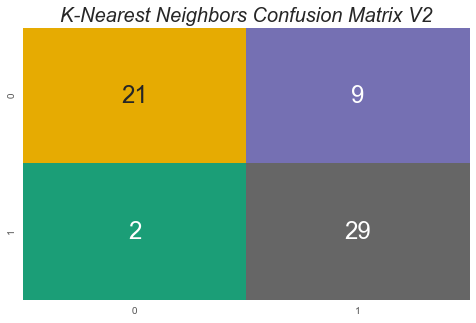

In [32]:
cm_knn=confusion_matrix(y_test,y_predict)
#Membuat Confusion Matrix

plt.figure(figsize=(8,5))
plt.title("K-Nearest Neighbors Confusion Matrix V2",fontsize=20, style='oblique')
sns.heatmap(cm_knn,annot=True,cmap="Dark2",fmt="d",cbar=False, annot_kws={"size": 24})
#heatmap berfungsi untuk visualisasi kotak2 biar lebih enak dilihat aja sih

**Support Machine System**

In [33]:
from sklearn.svm import SVC
model3 = SVC(random_state=1)
#Mendapatkan Model
model3.fit(x_train, y_train)
#Train atau Fit model

y_pred3 = model3.predict(x_test)
#Dapatkan y prediction
print(classification_report(y_test, y_pred3))
#Output accuracy

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        30
           1       0.72      0.84      0.78        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



Hasil Persentasi Accuracy dari model Support Machine System adalah 75%

**Membuat Confusion Matrix**

<AxesSubplot:title={'center':'Support Machine System Confusion Matrix'}>

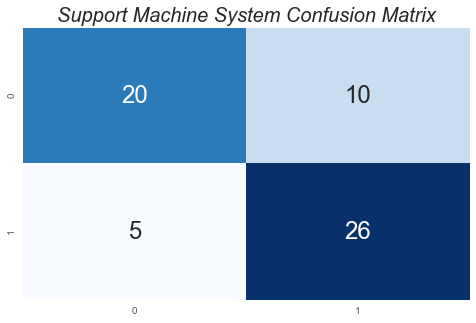

In [34]:
cm_svm=confusion_matrix(y_test,y_pred3)
#Membuat Confusion Matrix

plt.figure(figsize=(8,5))
plt.title("Support Machine System Confusion Matrix",fontsize=20, style='oblique')
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
#heatmap berfungsi untuk visualisasi kotak2 biar lebih enak dilihat aja sih

Coba menyetel parameter untuk menjadikan model lebih baik menggunakan GridSearch.

# Gridsearch

In [35]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................ C=0.1, gamma=0.01, total=   0.1s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.8s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

**gunakan grid model dan buat prediksi menggunakan test set dan buat classification reports**

In [36]:
grid_predictions = grid.predict(x_test)
print(classification_report(y_test,grid_predictions))
print(confusion_matrix(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        30
           1       0.72      0.84      0.78        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61

[[20 10]
 [ 5 26]]


Ternyata tidak ada perubahan wkw

**Naive Bayes**

In [37]:
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()
#Mendapatkan Model
model4.fit(x_train, y_train)
#Train atau Fit model 

y_pred4 = model4.predict(x_test)
#Dapakan y prediction
print(classification_report(y_test, y_pred4))
#output accuracy

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        30
           1       0.76      0.81      0.78        31

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



Hasil Persentasi Accuracy dari model NaiveBayes adalah 77%

**Membuat Confusion Matrix**

<AxesSubplot:title={'center':'Naive Bayes Confusion Matrix'}>

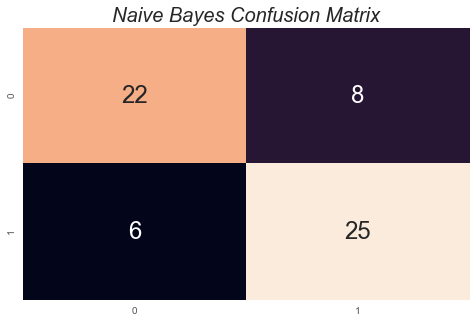

In [38]:
cm_nb=confusion_matrix(y_test,y_pred4)
#Membuat Confusion Matrix

plt.figure(figsize=(8,5))
plt.title("Naive Bayes Confusion Matrix",fontsize=20, style='oblique')
sns.heatmap(cm_nb,annot=True,cmap="rocket",fmt="d",cbar=False, annot_kws={"size": 24})
#heatmap berfungsi untuk visualisasi kotak2 biar lebih enak dilihat aja sih

**Decision Tree**

In [39]:
from sklearn.tree import DecisionTreeClassifier
model5 = DecisionTreeClassifier(random_state=1)
#Mendapatkan Model
model5.fit(x_train, y_train)
#Train atau Fit model 

y_pred5 = model5.predict(x_test)
#Dapakan y prediction
print(classification_report(y_test, y_pred5))
#output accuracy

              precision    recall  f1-score   support

           0       0.68      0.70      0.69        30
           1       0.70      0.68      0.69        31

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



Hasil Persentasi Accuracy dari model Decision Tree adalah 69%

**Membuat Confusion Matrix**

<AxesSubplot:title={'center':'Decision Tree Confusion Matrix'}>

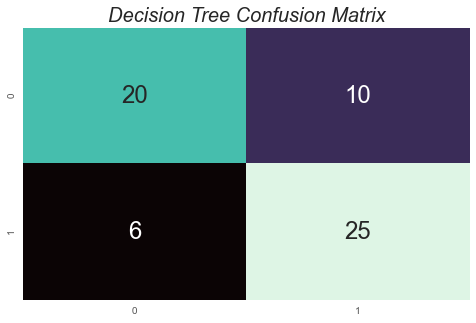

In [40]:
cm_dt=confusion_matrix(y_test,y_pred1)
#Membuat Confusion Matrix

plt.figure(figsize=(8,5))
plt.title("Decision Tree Confusion Matrix",fontsize=20, style='oblique')
sns.heatmap(cm_dt,annot=True,cmap="mako",fmt="d",cbar=False, annot_kws={"size": 24})
#heatmap berfungsi untuk visualisasi kotak2 biar lebih enak dilihat aja sih

**Random Forest**

In [41]:
from sklearn.ensemble import RandomForestClassifier
model6 = RandomForestClassifier(random_state=1)
#Mendapatkan Model
model6.fit(x_train, y_train) 
#Train atau Fit model 

y_pred6 = model6.predict(x_test)
#Dapatkan y prediction
print(classification_report(y_test, y_pred6))
#output accuracy

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.76      0.90      0.82        31

    accuracy                           0.80        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



Hasil Persentasi Accuracy dari model Random Forest adalah 80%

**Membuat Confusion Matrix**

<AxesSubplot:title={'center':'Random Forest Confusion Matrix'}>

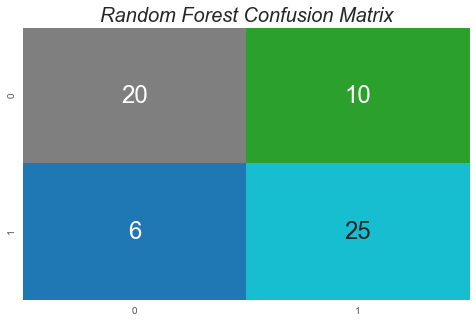

In [42]:
cm_rf=confusion_matrix(y_test,y_pred1)
#Membuat Confusion Matrix

plt.figure(figsize=(8,5))
plt.title("Random Forest Confusion Matrix",fontsize=20, style='oblique')
sns.heatmap(cm_rf,annot=True,cmap="tab10",fmt="d",cbar=False, annot_kws={"size": 24})
#heatmap berfungsi untuk visualisasi kotak2 biar lebih enak dilihat aja sih

**XGBoost**

In [43]:
from xgboost import XGBClassifier

model7 = XGBClassifier(random_state=1)
#Mendapatkan Model
model7.fit(x_train, y_train)
#Train atau Fit model

y_pred7 = model7.predict(x_test)
#Dapatkan y prediction
print(classification_report(y_test, y_pred7))
#output accuracy

C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:03:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.84      0.70      0.76        30
           1       0.75      0.87      0.81        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



Hasil Persentasi Accuracy dari model XGBoost adalah 79%

**Membuat Confusion Matrix**

<AxesSubplot:title={'center':'XGBoosy Confusion Matrix'}>

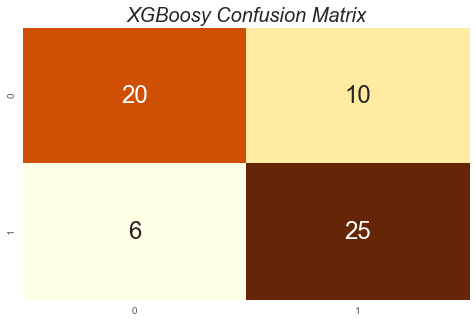

In [44]:
cm_xgb=confusion_matrix(y_test,y_pred1)
#Membuat Confusion Matrix

plt.figure(figsize=(8,5))
plt.title("XGBoosy Confusion Matrix",fontsize=20, style='oblique')
sns.heatmap(cm_xgb,annot=True,cmap="YlOrBr",fmt="d",cbar=False, annot_kws={"size": 24})
#heatmap berfungsi untuk visualisasi kotak2 biar lebih enak dilihat aja sih

# Visualisasi Bandingan Semua Model Classification

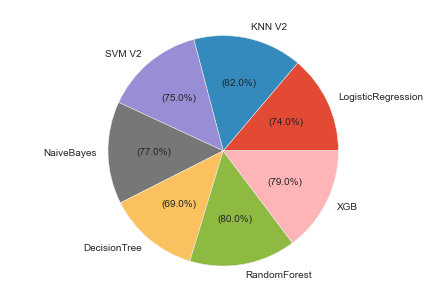

In [45]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
#Pengaturan ukuran pie

Classification = ['LogisticRegression', 'KNN V2', 'SVM V2','NaiveBayes', 'DecisionTree', 'RandomForest','XGB']
accuracy       = [74,82,75,77,69,80,79]
#List

def make_autopct(accuracy):
    def my_autopct(pct):
        total = sum(accuracy)
        val = int(round(pct*total/100.0))
        return '({v:.1f}%)'.format(v=val)
    return my_autopct
#Perulangan yang menghasilkan output persen %

ax.pie(accuracy,labels=Classification, autopct=make_autopct(accuracy))
#Masukkan List dan perulangan

plt.show()
#Output

In [46]:
#Mari kita lihat dalam bentuk float

from sklearn.metrics import accuracy_score
#import library accuracy_score

print('accuracy LogisticReg adalah :',accuracy_score(y_pred1,y_test))
print("------------------------------------------------------------")
print('accuracy KNN V2 adalah :',accuracy_score(y_predict,y_test))
print("------------------------------------------------------------")
print('accuracy SVM V2 adalah :',accuracy_score(y_pred3,y_test))
print("------------------------------------------------------------")
print('accuracy NaiveBayes adalah :',accuracy_score(y_pred4,y_test))
print("------------------------------------------------------------")
print('accuracy DecisionTree adalah :',accuracy_score(y_pred5,y_test))
print("------------------------------------------------------------")
print('accuracy RandomForest adalah :',accuracy_score(y_pred6,y_test))
print("------------------------------------------------------------")
print('accuracy XGBoost adalah :',accuracy_score(y_pred7,y_test))
print("------------------------------------------------------------")

accuracy LogisticReg adalah : 0.7377049180327869
------------------------------------------------------------
accuracy KNN V2 adalah : 0.819672131147541
------------------------------------------------------------
accuracy SVM V2 adalah : 0.7540983606557377
------------------------------------------------------------
accuracy NaiveBayes adalah : 0.7704918032786885
------------------------------------------------------------
accuracy DecisionTree adalah : 0.6885245901639344
------------------------------------------------------------
accuracy RandomForest adalah : 0.8032786885245902
------------------------------------------------------------
accuracy XGBoost adalah : 0.7868852459016393
------------------------------------------------------------


**Hasil : K-Nearest Neighbors (KNN) memiliki accuracy tertinggi**

https://randyanugerah.medium.com/klasifikasi-penyakit-jantung-dengan-machine-learning-algoritma-pada-python-project-bccfef93cec4.
